# 4. Automatic Peak Detection

If there are a lot of peaks in a spectrum it can be tedious to manually specify their locations in order to do a fit. Auto peak detection can generate a list of `PeakParams` so reducing this work somewhat.

## 4.1. Automatically detecting peaks


Peaks are detected from a spectrum so the first thing to do is to load up a `FitSpectrum` object.

Diffraction pattern successfully loaded from file.


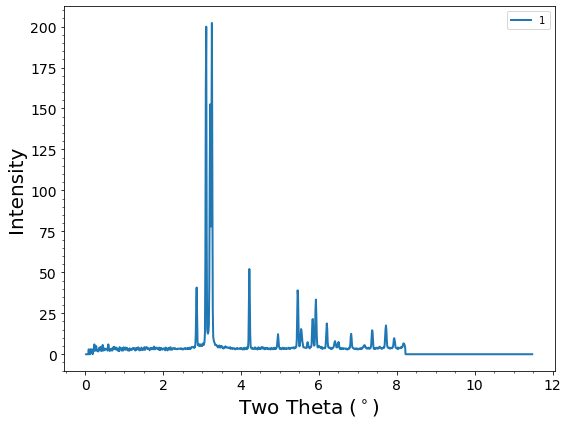

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum

spectral_data = FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)
spectral_data.plot(1)

We can see that the region of interest lies between 2.5 and 8 so the first step is to zoom in a bit on this region.

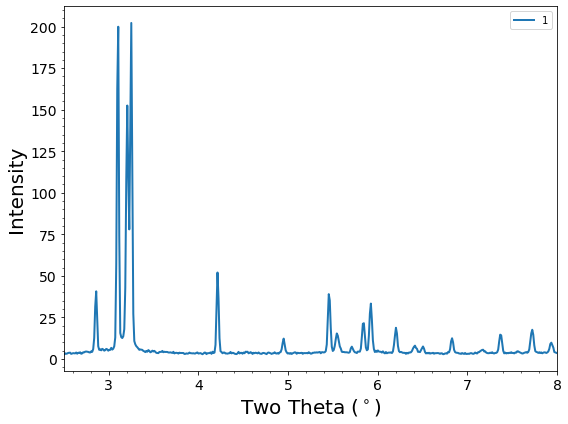

In [2]:
spectral_data.plot(1, (2.5, 8))

Now we use the `detect_peaks` method of the `FitSpectrum` to get some estimated PeakParams.

In [3]:
spectral_data.detect_peaks(1, (2.5, 8))

[PeakParams('0', (2.77, 2.95)),
PeakParams('4', (4.12, 4.3)),
PeakParams('5', (4.85, 5.05)),
PeakParams('6', (5.34, 5.57)),
PeakParams('7', (5.41, 5.68)),
PeakParams('8', (5.73, 5.96)),
PeakParams('9', (5.81, 6.03)),
PeakParams('10', (6.09, 6.31)),
PeakParams('11', (6.25, 6.58)),
PeakParams('12', (6.72, 6.94)),
PeakParams('13', (7.24, 7.49)),
PeakParams('14', (7.59, 7.86)),
PeakParams('15', (7.8, 8.07))]


These PeakParams aren't likely to be perfect, some peaks may be missed or misidentified so it is worth plotting them to check that they are OK. In general the fits work best where there is at least 5 data points at the baseline either side of the peak. Where peaks are closer together than this it can often be better to combine the peaks into a multiplet fit rather than trying to fit them separately.

Here the graph is a bit small to see the detail so I chop it up into a couple of subsections to evaluate the quality of the estimated PeakParams.

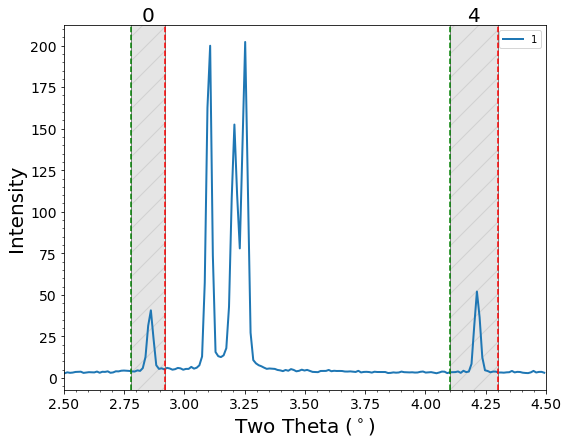

In [4]:
spectral_data.plot_peak_params([PeakParams('0', (2.78, 2.92)), PeakParams('4', (4.10, 4.30))], 1, (2.5, 4.5))

The first couple of peaks look fine, I have just widened the peak bounds a little.

Now for the estimated peaks in the middle section of the spectrum.

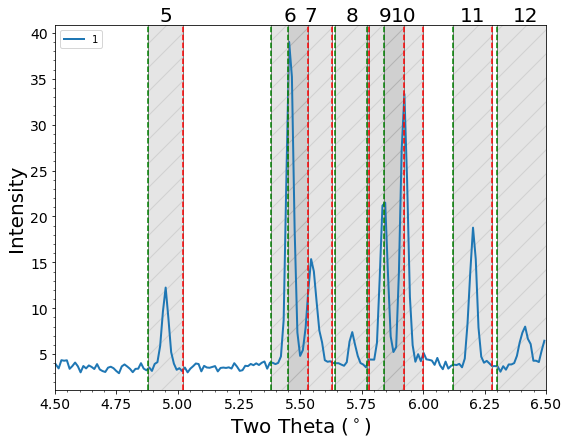

In [5]:
spectral_data.plot_peak_params([PeakParams('5', (4.88, 5.02)),
                                PeakParams('6', (5.38, 5.53)),
                                PeakParams('7', (5.45, 5.63)),
                                PeakParams('8', (5.64, 5.78)),
                                PeakParams('9', (5.77, 5.92)),
                                PeakParams('10', (5.84, 6.0)),
                                PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.3, 6.53))], 
                               1, (4.5, 6.5))

Here the peak finding algorithm has made some of the `PeakParams` too wide so I cut these down a bit.

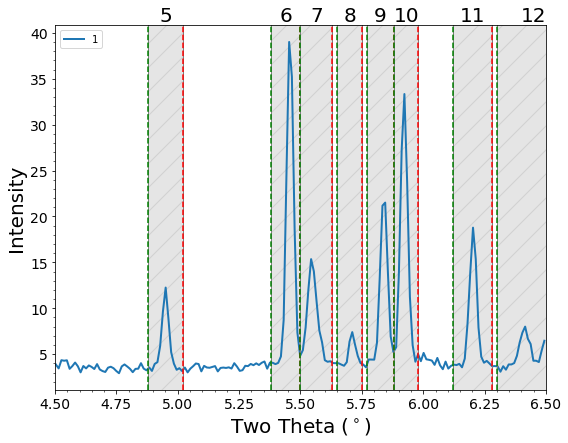

In [6]:
spectral_data.plot_peak_params([PeakParams('5', (4.88, 5.02)),
                                PeakParams('6', (5.38, 5.50)),
                                PeakParams('7', (5.50, 5.63)),
                                PeakParams('8', (5.65, 5.75)),
                                PeakParams('9', (5.77, 5.88)),
                                PeakParams('10', (5.88, 5.98)),
                                PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.30, 6.60))], 
                               1, (4.5, 6.5))

Peaks 6 and 7 and peaks 9 and 10 are overlapping at the edges so I would be inclined to fit these as doublets. Again, it can be good to zoom in a little on regions of dense peaks.

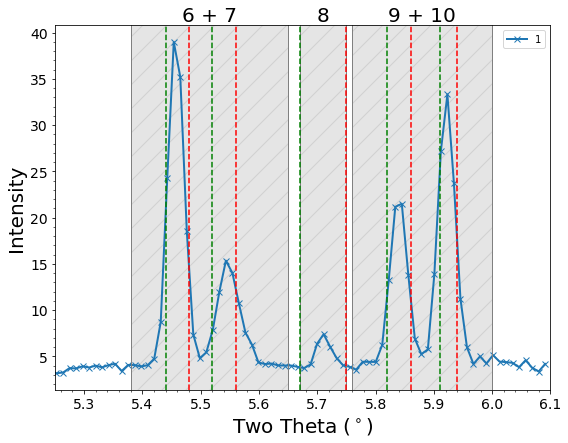

In [7]:
spectral_data.plot_peak_params([PeakParams('6 + 7', (5.38, 5.65), [(5.44, 5.48), (5.52, 5.56)]),
                                PeakParams('8', (5.67, 5.75)),
                                PeakParams('9 + 10', (5.76, 6.00), [(5.82, 5.86), (5.91, 5.94)])
                               ],
                               1, (5.25, 6.1), show_points=True)

Now the middle is sorted, we just need to tweak the end of the spectrum. Here are the estimated points:

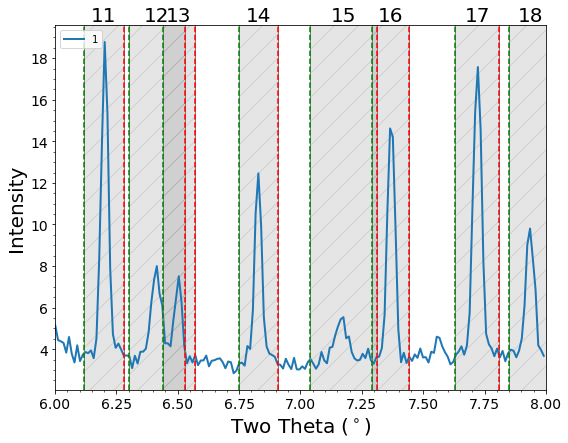

In [8]:
spectral_data.plot_peak_params([PeakParams('11', (6.12, 6.28)),
                                PeakParams('12', (6.3, 6.53)),
                                PeakParams('13', (6.44, 6.57)),
                                PeakParams('14', (6.75, 6.91)),
                                PeakParams('15', (7.04, 7.31)),
                                PeakParams('16', (7.29, 7.44)),
                                PeakParams('17', (7.63, 7.81)),
                                PeakParams('18', (7.85, 8.02))],
                              1, (6.0, 8.0))

Again, 12 and 13 are probably a good doublet while 15 is too small so I decide to remove it.

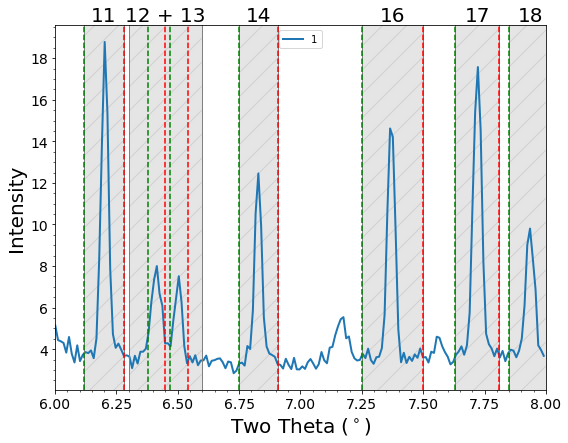

In [9]:
spectral_data.plot_peak_params([PeakParams('11', (6.12, 6.28)),
                                PeakParams('12 + 13', (6.30, 6.60), [(6.38, 6.45), (6.47, 6.54)]),
                                PeakParams('14', (6.75, 6.91)),
                                PeakParams('16', (7.25, 7.50)),
                                PeakParams('17', (7.63, 7.81)),
                                PeakParams('18', (7.85, 8.02))],
                              1, (6.0, 8.0))

Finally I collate the adjusted PeakParams, renumber them (you might want to put physically meaningful names here like crystal lattice names) and then run the fit.

Fitting complete.


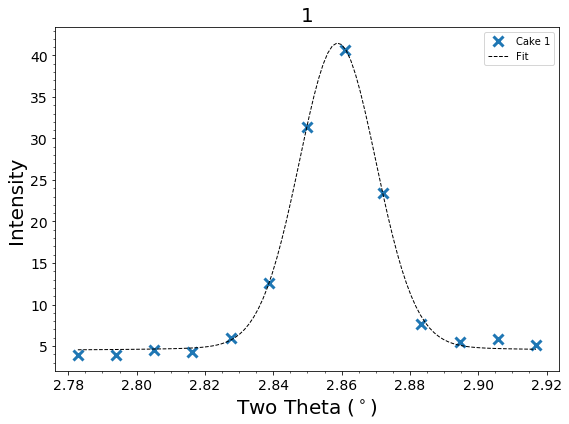

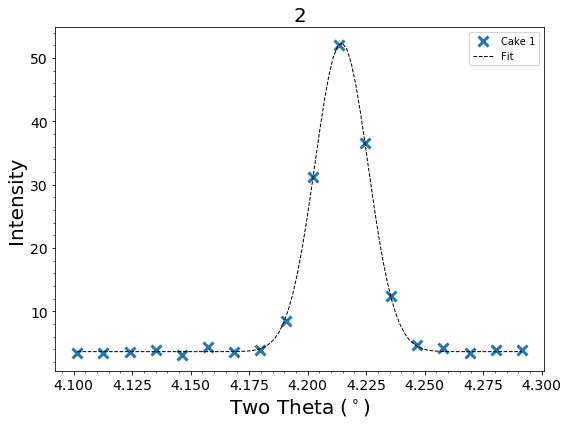

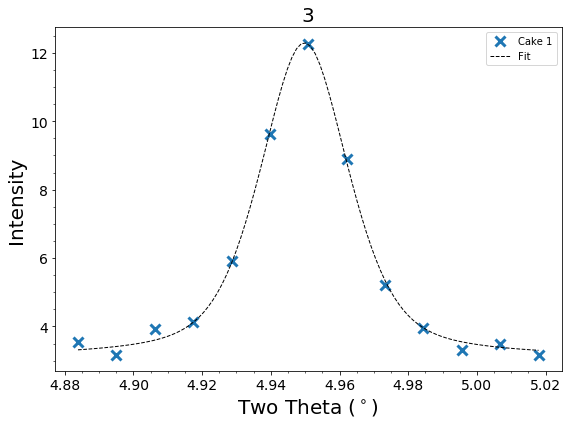

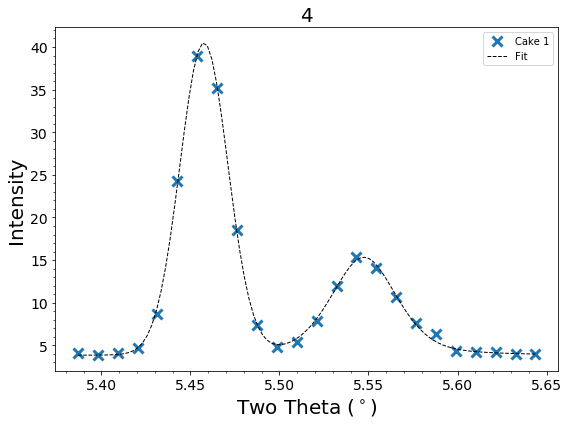

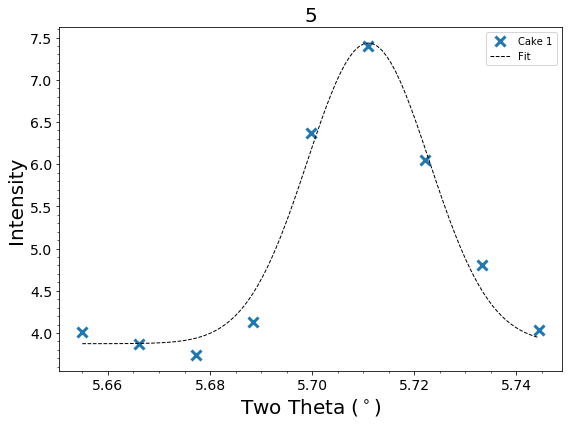

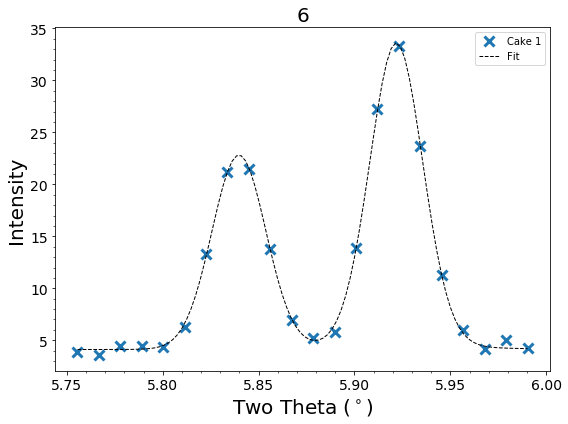

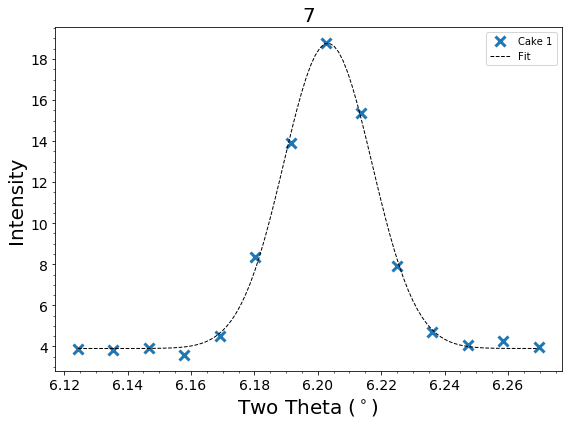

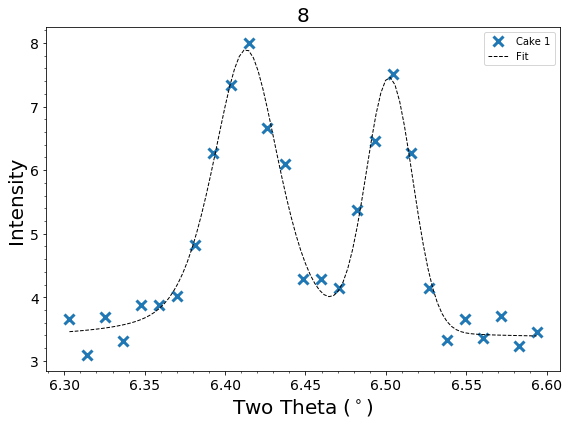

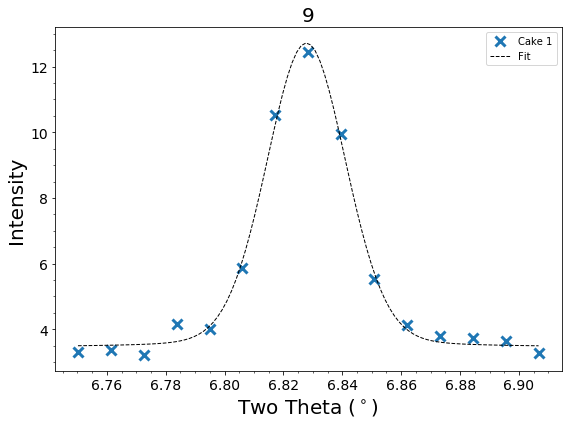

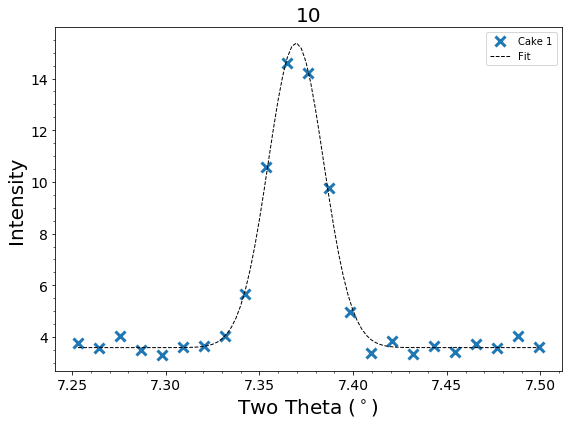

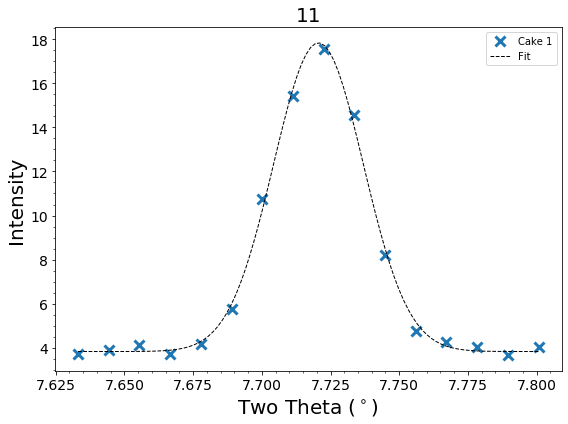

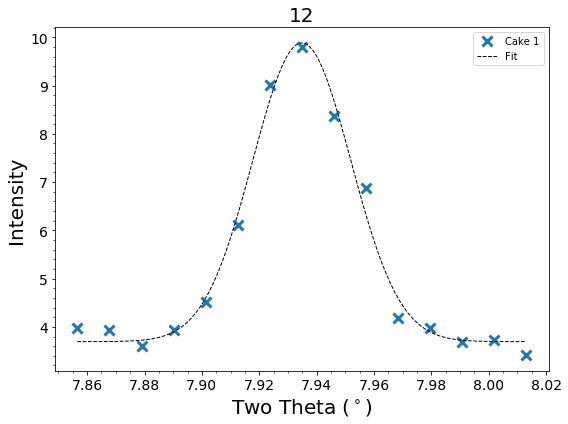

In [10]:
peak_params = [PeakParams('1', (2.78, 2.92)),
               PeakParams('2', (4.10, 4.30)),
               PeakParams('3', (4.88, 5.02)),
               PeakParams('4', (5.38, 5.65), [(5.44, 5.48), (5.52, 5.56)]),
               PeakParams('5', (5.65, 5.75)),
               PeakParams('6', (5.75, 6.00), [(5.82, 5.86), (5.91, 5.94)]),
               PeakParams('7', (6.12, 6.28)),
               PeakParams('8', (6.30, 6.60), [(6.38, 6.45), (6.47, 6.54)]),
               PeakParams('9', (6.75, 6.91)),
               PeakParams('10', (7.25, 7.50)),
               PeakParams('11', (7.63, 7.81)),
               PeakParams('12', (7.85, 8.02))]
spectral_data.fit_peaks(peak_params, 1)

for fit in spectral_data.fitted_peaks:
    fit.plot()

At this point, if any of the fits look off you can tweak the parameters again. It is up to you how much time you want to spend - it may well be the case that a perfect fit is unimportant in the grand scale of things and an adequate fit is enough. If the spectrum is a simple one then it might well be that the automatically generated PeakParams are good enough that the fitting   will work pretty well.